In [23]:
import os
import clip
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.datasets import CIFAR100

Files already downloaded and verified


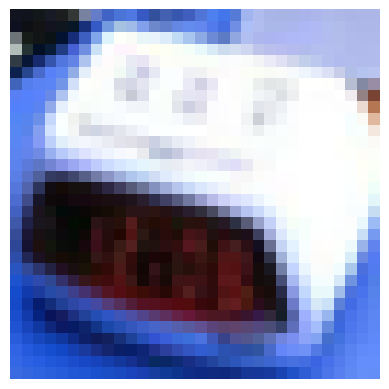


Top predictions:

           clock: 72.35%
    sweet_pepper: 5.04%
   aquarium_fish: 1.95%
             bed: 1.63%
             can: 1.56%


In [21]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[450]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Masquer les axes
plt.show()

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")

Files already downloaded and verified


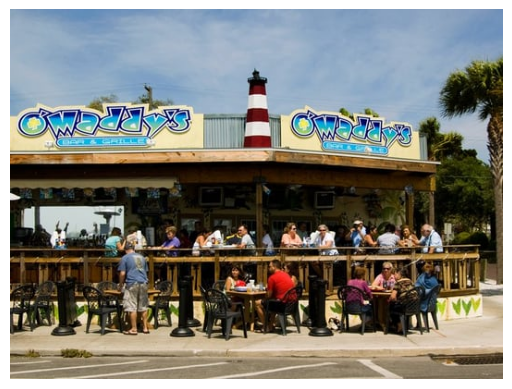


Top predictions:

           table: 18.22%
   aquarium_fish: 8.02%
           shark: 4.12%
             ray: 3.84%
           plate: 2.92%


In [31]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Chemin vers le répertoire contenant les images locales
local_image_dir = 'yelp_photos\photos'

# Obtenir la liste des fichiers d'images dans le répertoire
image_files = [os.path.join(local_image_dir, f) for f in os.listdir(local_image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Vérifiez qu'il y a des images dans le répertoire
if not image_files:
    raise FileNotFoundError(f"Aucune image trouvée dans le répertoire {local_image_dir}")

# Charger une image spécifique
image_path = image_files[85] # Vous pouvez changer l'index pour charger une autre image
image = Image.open(image_path)

# Prétraiter l'image
image_input = preprocess(image).unsqueeze(0).to(device)

# Utiliser les classes de CIFAR-100 pour la prédiction textuelle
cifar100_classes = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False).classes
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100_classes]).to(device)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Masquer les axes
plt.show()

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")

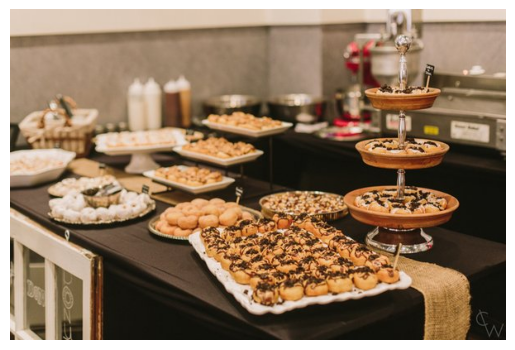


Top predictions:

            food: 65.43%
            menu: 27.54%
          inside: 4.75%
           drink: 1.47%
         outside: 0.82%


In [41]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Chemin vers le répertoire contenant les images locales
local_image_dir = 'yelp_photos\photos'

# Obtenir la liste des fichiers d'images dans le répertoire
image_files = [os.path.join(local_image_dir, f) for f in os.listdir(local_image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Vérifiez qu'il y a des images dans le répertoire
if not image_files:
    raise FileNotFoundError(f"Aucune image trouvée dans le répertoire {local_image_dir}")

# Charger une image spécifique
image_path = image_files[455] # Vous pouvez changer l'index pour charger une autre image
image = Image.open(image_path)

# Prétraiter l'image
image_input = preprocess(image).unsqueeze(0).to(device)

# Utiliser les classes de CIFAR-100 pour la prédiction textuelle
# Définir vos propres classes pour la prédiction textuelle
custom_classes = ["drink", "food", "inside", "menu", "outside"]

text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in custom_classes]).to(device)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Masquer les axes
plt.show()

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{custom_classes[index]:>16s}: {100 * value.item():.2f}%")